In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd 
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
from tqdm import tqdm 
%matplotlib inline

In [2]:
## mm_tracking
#need to get keys first from all session dataframes to read into pandas 
h5file=pd.HDFStore('/projects/b1118/miniscope/analysis/event_analysis/mm_tracking_output/movement_regions_for_analysis.h5')
keys=h5file.keys()
h5file.close()
#load fluorescence in event regions
z_scored_events_by_session_mm = {key_idx.strip('/'):pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/mm_tracking_output/movement_regions_for_analysis.h5', 
                                                             key=key_idx) for key_idx in keys}
#load velocity data 
velocity_data_mm = pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/compiled_velocity_all_sessions_mm_tracking.h5')

In [3]:
## dlc_analysis
#need to get keys first from all session dataframes to read into pandas 
h5file=pd.HDFStore('/projects/b1118/miniscope/analysis/event_analysis/movement_regions_for_analysis_2.h5')
keys=h5file.keys()
h5file.close()
#load fluorescence in event regions
z_scored_events_by_session = {key_idx.strip('/'):pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/movement_regions_for_analysis_2.h5', key=key_idx) for key_idx in keys}
#load velocity data 
velocity_data = pd.read_hdf('/projects/b1118/miniscope/analysis/event_analysis/compiled_velocity_all_sessions.h5')


In [21]:
velocity_data.index.levels[0]

Index(['GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53', 'GRIN039_H12_M26_S54',
       'GRIN013_H13_M33_S54', 'GRIN027_H13_M29_S44', 'GRIN033_H14_M34_S32',
       'GRIN033_H13_M42_S33', 'GRIN032_H17_M30_S22', 'GRIN034_H15_M28_S2',
       'GRIN026_H16_M35_S34', 'GRIN032_H16_M49_S22', 'GRIN034_H16_M13_S22',
       'GRIN034_H19_M0_S18', 'GRIN035_H13_M50_S58', 'GRIN035_H13_M31_S20',
       'GRIN035_H14_M40_S34', 'GRIN038_H15_M39_S40', 'GRIN038_H11_M57_S0',
       'GRIN038_H13_M37_S23', 'GRIN041_H12_M54_S49', 'GRIN009_H13_M59_S14',
       'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53', 'GRIN011_H10_M19_S59',
       'GRIN012_H17_M46_S35', 'GRIN012_H17_M32_S17', 'GRIN012_H16_M57_S23'],
      dtype='object')

In [22]:
## plot mm detected events
session = 'GRIN038_H11_M57_S0'
#downsample dlc to .2 seconds
new_sampling_interval=.2
Dlc_v_data_resampled = velocity_data.loc[session].resample(str(new_sampling_interval)+'S').max()
Dlc_v_data_resampled['datetime'] = Dlc_v_data_resampled.index.values.astype('datetime64[ns]')

In [23]:
#velocity_data_mm.loc[session]

In [24]:
#detected events 
mm_onsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[0].values.astype('datetime64[ns]')
mm_offsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[1].values.astype('datetime64[ns]')
#detected events 
dlc_onsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[0].values.astype('datetime64[ns]')
dlc_offsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[1].values.astype('datetime64[ns]')

In [31]:
mm_onsets

array(['1970-01-01T00:00:16.600000000', '1970-01-01T00:00:21.000000000',
       '1970-01-01T00:00:37.400000000', '1970-01-01T00:00:51.800000000',
       '1970-01-01T00:01:06.200000000', '1970-01-01T00:01:19.000000000',
       '1970-01-01T00:01:23.600000000', '1970-01-01T00:01:49.000000000',
       '1970-01-01T00:01:57.000000000', '1970-01-01T00:02:15.200000000',
       '1970-01-01T00:02:26.800000000', '1970-01-01T00:02:35.400000000',
       '1970-01-01T00:02:41.600000000', '1970-01-01T00:02:53.200000000',
       '1970-01-01T00:03:42.400000000', '1970-01-01T00:03:53.000000000',
       '1970-01-01T00:03:57.600000000', '1970-01-01T00:04:02.000000000',
       '1970-01-01T00:04:30.600000000', '1970-01-01T00:04:40.000000000',
       '1970-01-01T00:04:51.600000000', '1970-01-01T00:05:03.000000000',
       '1970-01-01T00:05:12.600000000', '1970-01-01T00:05:30.200000000',
       '1970-01-01T00:05:54.800000000', '1970-01-01T00:06:07.800000000',
       '1970-01-01T00:07:18.200000000', '1970-01-01

In [25]:
len(velocity_data_mm.loc[session])

6667

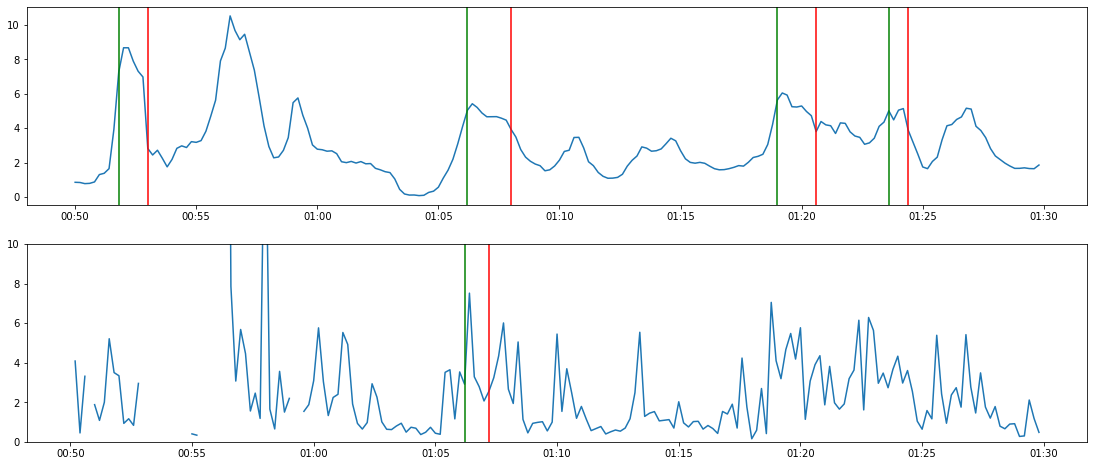

In [30]:
#plot
plot_range=(250,450)
fig = plt.figure()
grid=(6,2)
fig.set_size_inches(19,8)
myFmt = DateFormatter("%M:%S")
ax = plt.subplot2grid(grid, (0, 0), rowspan=3, colspan=2) 
ax1 = plt.subplot2grid(grid, (3, 0), rowspan=3, colspan=2) 
ax.plot(velocity_data_mm.loc[session]['datetime'].iloc[plot_range[0]:plot_range[1]], 
        velocity_data_mm.loc[session]['mm_speed'].iloc[plot_range[0]:plot_range[1]])
ax.xaxis.set_major_formatter(myFmt)
for onset, offset in zip(mm_onsets, mm_offsets):
    if (velocity_data_mm.loc[session]['datetime'].iloc[plot_range[0]]<onset<velocity_data_mm.loc[session]['datetime'].iloc[plot_range[1]]) and (velocity_data_mm.loc[session]['datetime'].iloc[plot_range[0]]<offset<velocity_data_mm.loc[session]['datetime'].iloc[plot_range[1]]): 
        ax.axvline(x=onset, color='g')
        ax.axvline(x=offset, color='r')
ax1.plot(Dlc_v_data_resampled['datetime'].iloc[plot_range[0]:plot_range[1]], 
        Dlc_v_data_resampled['tail_base'].iloc[plot_range[0]:plot_range[1]])
ax1.set_ylim((0, 10))
ax1.xaxis.set_major_formatter(myFmt)
for onset, offset in zip(dlc_onsets, dlc_offsets):
    if (Dlc_v_data_resampled['datetime'].iloc[plot_range[0]]<onset<Dlc_v_data_resampled['datetime'].iloc[plot_range[1]]) and (Dlc_v_data_resampled['datetime'].iloc[plot_range[0]]<offset<Dlc_v_data_resampled['datetime'].iloc[plot_range[1]]): 
        ax1.axvline(x=onset, color='g')
        ax1.axvline(x=offset, color='r')
plt.subplots_adjust(hspace=1)
plt.show()

In [10]:
#detected events 
mm_onsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[0].values
mm_offsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[1].values
#detected events 
dlc_onsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[0].values
dlc_offsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[1].values

In [27]:
hits=[]
for range_td in tqdm([pd.timedelta_range(start=dlc_onsets[idx_dlc], end=dlc_offsets[idx_dlc], freq='0.2S') for idx_dlc in range(len(dlc_onsets))]):
    for sample_point in range_td:
        for range_td_mm in [pd.timedelta_range(start=mm_onsets[idx], end=mm_offsets[idx], freq='0.2S') for idx in range(len(mm_onsets))]:
            if sample_point in range_td_mm:
                hits.append(sample_point)

100%|██████████| 143/143 [00:47<00:00,  3.03it/s]


In [39]:
dlc_events_in_mm_tracking = len(hits)/sum(total_mm_length)
dlc_events_in_mm_tracking

0.2927524429967427

In [55]:
hit_percent_by_session_dlcbydlc = {}
hit_percent_by_session_dlcbymm = {}
for session in tqdm(list(z_scored_events_by_session_mm.keys())):
    #detected events 
    mm_onsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[0].values
    mm_offsets = z_scored_events_by_session_mm[session].loc['z_scored_movement_regions'].index.levels[1].values
    #detected events 
    dlc_onsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[0].values
    dlc_offsets = z_scored_events_by_session[session].loc['z_scored_movement_regions'].index.levels[1].values
    hits=[]
    for range_td in tqdm([pd.timedelta_range(start=dlc_onsets[idx_dlc], end=dlc_offsets[idx_dlc], freq='0.2S') for idx_dlc in range(len(dlc_onsets))]):
        for sample_point in range_td:
            for range_td_mm in [pd.timedelta_range(start=mm_onsets[idx], end=mm_offsets[idx], freq='0.2S') for idx in range(len(mm_onsets))]:
                if sample_point in range_td_mm:
                    hits.append(sample_point)
    
    total_dlc_points = sum([len(range_td) for range_td in [pd.timedelta_range(start=dlc_onsets[idx_dlc], end=dlc_offsets[idx_dlc], freq='0.2S') for idx_dlc in range(len(dlc_onsets))]])
    
    total_mm_points = sum([len(range_td_mm) for range_td_mm in [pd.timedelta_range(start=mm_onsets[idx], end=mm_offsets[idx], freq='0.2S') for idx in range(len(mm_onsets))]])
    
    hit_percent_by_session_dlcbydlc[session] = len(hits)/total_dlc_points
    hit_percent_by_session_dlcbymm[session] = len(hits)/total_mm_points


100%|██████████| 24/24 [08:25<00:00, 21.07s/it]


In [56]:
total_dlc_points = sum([len(range_td) for range_td in [pd.timedelta_range(start=dlc_onsets[idx_dlc], end=dlc_offsets[idx_dlc], freq='0.2S') for idx_dlc in range(len(dlc_onsets))]])
total_dlc_points

1028

In [57]:
total_mm_length = sum([len(range_td_mm) for range_td_mm in [pd.timedelta_range(start=mm_onsets[idx], end=mm_offsets[idx], freq='0.2S') for idx in range(len(mm_onsets))]])
total_mm_length

1870

In [62]:
hit_percent_by_session_dlcbydlc

{'GRIN009_H13_M59_S14': 0.7576742506319971,
 'GRIN011_H10_M19_S59': 0.6259971844204599,
 'GRIN012_H16_M57_S23': 0.7927565392354124,
 'GRIN012_H17_M32_S17': 0.7072072072072072,
 'GRIN013_H13_M33_S54': 0.7870167760758571,
 'GRIN018_H16_M13_S53': 0.39418859649122806,
 'GRIN018_H17_M41_S43': 0.3576158940397351,
 'GRIN027_H13_M29_S44': 0.5538461538461539,
 'GRIN032_H17_M30_S22': 0.7839433293978748,
 'GRIN033_H13_M42_S33': 0.6482545293857711,
 'GRIN033_H14_M34_S32': 0.8956908344733242,
 'GRIN034_H15_M28_S2': 0.817169373549884,
 'GRIN034_H16_M13_S22': 0.8798754806811939,
 'GRIN034_H19_M0_S18': 0.7971768202080238,
 'GRIN035_H13_M31_S20': 0.678429291589281,
 'GRIN035_H13_M50_S58': 0.7628805620608899,
 'GRIN035_H14_M40_S34': 0.6345213137665968,
 'GRIN038_H11_M57_S0': 0.7016949152542373,
 'GRIN038_H13_M37_S23': 0.35724137931034483,
 'GRIN038_H15_M39_S40': 0.16206896551724137,
 'GRIN039_H12_M26_S54': 0.042417815482502653,
 'GRIN039_H12_M33_S29': 0.05628058727569331,
 'GRIN039_H14_M8_S53': 0.003802

In [63]:
hit_percent_by_session_dlcbymm

{'GRIN009_H13_M59_S14': 0.5105865174008275,
 'GRIN011_H10_M19_S59': 0.37004160887656035,
 'GRIN012_H16_M57_S23': 0.563796804197472,
 'GRIN012_H17_M32_S17': 0.5391483516483516,
 'GRIN013_H13_M33_S54': 0.31338948591344756,
 'GRIN018_H16_M13_S53': 0.2927524429967427,
 'GRIN018_H17_M41_S43': 0.10821643286573146,
 'GRIN027_H13_M29_S44': 0.07703281027104136,
 'GRIN032_H17_M30_S22': 0.6868965517241379,
 'GRIN033_H13_M42_S33': 0.4124262018554962,
 'GRIN033_H14_M34_S32': 0.545625,
 'GRIN034_H15_M28_S2': 0.7516005121638925,
 'GRIN034_H16_M13_S22': 0.8391547327977645,
 'GRIN034_H19_M0_S18': 0.21738249594813613,
 'GRIN035_H13_M31_S20': 0.5191878172588833,
 'GRIN035_H13_M50_S58': 0.23899486426999267,
 'GRIN035_H14_M40_S34': 0.2654970760233918,
 'GRIN038_H11_M57_S0': 0.3439680957128614,
 'GRIN038_H13_M37_S23': 0.23904014766958928,
 'GRIN038_H15_M39_S40': 0.09518987341772152,
 'GRIN039_H12_M26_S54': 0.03187250996015936,
 'GRIN039_H12_M33_S29': 0.032639545884579,
 'GRIN039_H14_M8_S53': 0.0259740259740